In [ ]:
import pandas as pd
import numpy as np
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
path = '../data/generated/df_newimages_bands_downside.pkl.z'

In [ ]:
df = jb.load(path)
df.head()

In [ ]:
features = df[['x', 'y', 'z', 'b1', 'b2', 'b3', 'b4', 'b5','b6', 'cspmb7']]

In [204]:
th = 200
var = 'y'
#X_train = features[features[var] >= th].drop(['x', 'y', 'z'], axis=1)
X_train = features[features[var] >= th][['b5', 'b1']]
y_train = features[features[var] >= th].z

#X_val = features[features[var] < th].drop(['x', 'y', 'z'], axis=1)
X_val = features[features[var] < th][['b5', 'b1']]
y_val = features[features[var] < th].z

X_train.shape, X_val.shape

((16084, 2), (3203, 2))

In [217]:
rf = RandomForestRegressor(n_estimators=500)

lgbm = LGBMRegressor(n_estimators=20, max_depth=1, min_samples_leaf=4)

In [227]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [228]:
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: min_samples_leaf


LGBMRegressor(max_depth=1, min_samples_leaf=4, n_estimators=20)

In [229]:
p = rf.predict(X_val)

In [230]:
p_lgbm = lgbm.predict(X_val)

In [231]:
print('rf:', r2_score(y_val, p))
print('lgbm:', r2_score(y_val, p_lgbm))

rf: 0.06183831626836511
lgbm: 0.22441046294031142


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

In [210]:
lr = LinearRegression()

In [240]:
th = 200
var = 'y'
#X_train = features[features[var] >= th].drop(['x', 'y', 'z'], axis=1)
X_train = df[features[var] >= th][['ndwi53']]
y_train = df[features[var] >= th].z

#X_val = features[features[var] < th].drop(['x', 'y', 'z'], axis=1)
X_val = df[features[var] < th][['ndwi53']]
y_val = df[features[var] < th].z

X_train.shape, X_val.shape

((16084, 1), (3203, 1))

In [241]:
import matplotlib.pyplot as plt

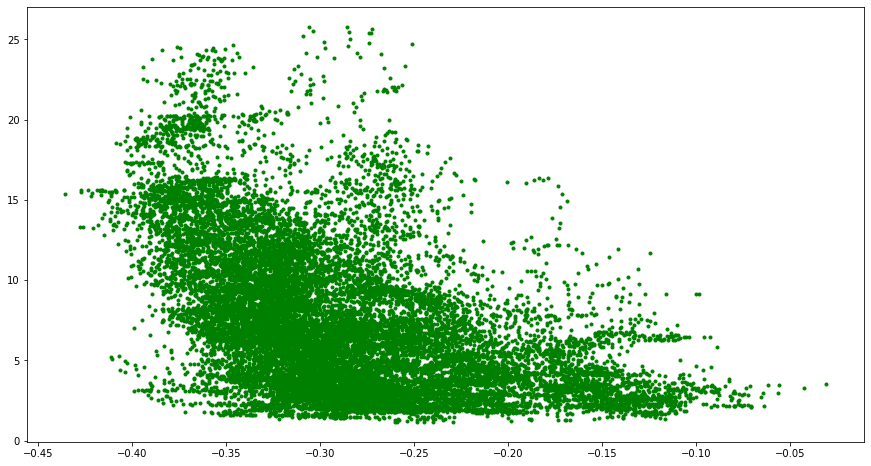

In [224]:
plt.figure(figsize=(15,8))
plt.plot(df['ndwi53'],df['z'], 'g.')

In [251]:
lr = LinearRegression(normalize=True)

In [252]:
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [253]:
p = lr.predict(X_val)

In [254]:
r2_score(y_val, p)

0.1750424564712949

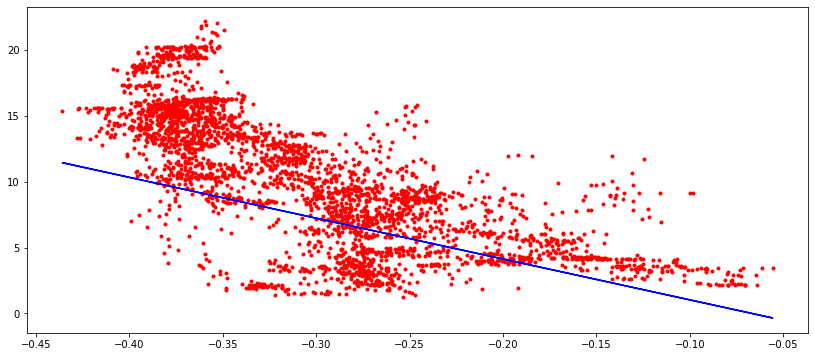

In [255]:
plt.figure(figsize=(14, 6))
plt.plot(X_val, y_val, 'r.', X_val, p, 'b-')

In [301]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [302]:
p = pol_reg.predict(poly_reg.transform(X_val))

In [303]:
r2_score(y_val, p)

0.4203149574620557

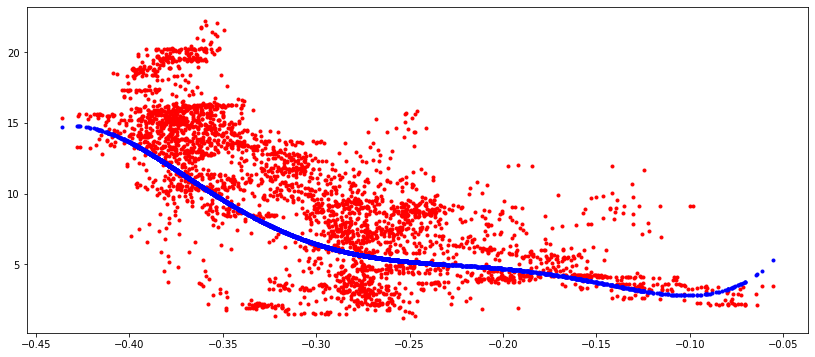

In [304]:
plt.figure(figsize=(14, 6))
plt.plot(X_val, y_val, 'r.', X_val, p, 'b.')

In [305]:
rf = RandomForestRegressor(n_estimators=500)


In [311]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [312]:
p_rf = rf.predict(X_val)

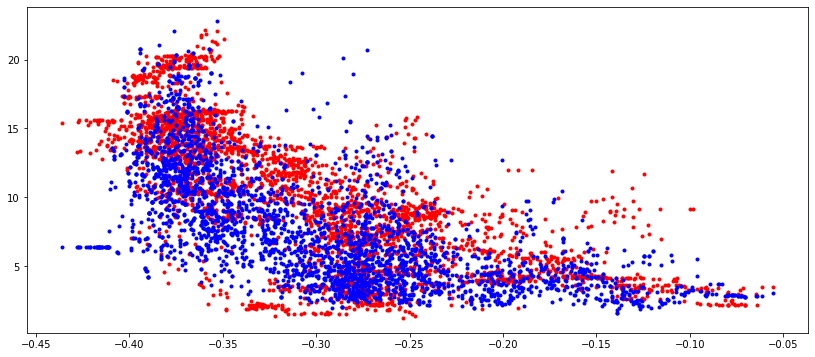

In [314]:
plt.figure(figsize=(14, 6))
plt.plot(X_val, y_val, 'r.', X_val, p_rf, 'b.')

In [313]:
r2_score(y_val, p_rf)

0.06380607483116452